In [1]:
!pip install neupy
# !pip install tensorflow

     |████████████████████████████████| 235kB 29.1MB/s 
     |████████████████████████████████| 92.6MB 48kB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 3.2MB 49.6MB/s 
     |████████████████████████████████| 368kB 51.0MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, Adagrad, SGD

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from neupy import algorithms
from neupy.layers import Input, Tanh, Linear 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
step = 0.025
elipsPoints = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)
parabolaPoints = np.linspace(-1, 1, int(2/step), endpoint=True)

def f(value, a, shiftX):
    return a * np.cos(value) + shiftX

def g(value, b, shiftY):
    return b * np.sin(value) + shiftY

def rotate(size, x, y, alpha):
    if len(x) != len(y) or size != len(x):
        raise TypeError
    for i in range(size):
        xNew = x[i] * np.cos(alpha) - y[i] * np.sin(alpha)
        yNew = x[i] * np.sin(alpha) + y[i] * np.cos(alpha)
        x[i] = xNew
        y[i] = yNew

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=20)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=76)
    return x_train, x_valid, x_test

In [4]:
a1 = 0.4
b1 = 0.15
alpha1 = np.pi / 6
shiftX1 = 0
shiftY1 = 0

a2 = 0.7
b2 = 0.5
alpha2 = np.pi / 3
shiftX2 = 0
shiftY2 = 0

p3 = 1
alpha3 = np.pi / 2
shiftX3 = 0
shiftY3 = -0.8

In [5]:
print(len(elipsPoints))
print(len(parabolaPoints))

first = np.random.permutation(elipsPoints)[:120]
second = np.random.permutation(elipsPoints)[:100]
third = np.random.permutation(parabolaPoints)[:60]

251
80


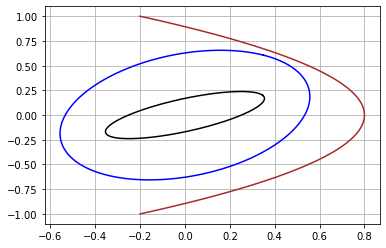

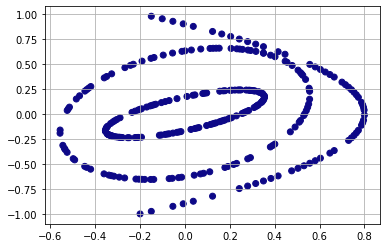

In [6]:

x1 = f(elipsPoints, a1, shiftX1)
y1 = g(elipsPoints, b1, shiftY1)
rotate(len(elipsPoints), x1, y1, alpha1)
x2 = f(elipsPoints, a2, shiftX2)
y2 = g(elipsPoints, b2, shiftY2)
rotate(len(elipsPoints), x2, y2, alpha2)
x3 = parabolaPoints + shiftX3
y3 = p3 * parabolaPoints * parabolaPoints + shiftY3
rotate(len(parabolaPoints), x3, y3, alpha3)

plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'blue')
plt.plot(x3, y3, 'brown')
plt.grid(True)
plt.show()

x1 = f(first, a1, shiftX1)
y1 = g(first, b1, shiftY1)
rotate(len(first), x1, y1, alpha1)
x2 = f(second, a2, shiftX2)
y2 = g(second, b2, shiftY2)
rotate(len(second), x2, y2, alpha2)
x3 = third + shiftX3
y3 = p3 * third * third + shiftY3
rotate(len(third), x3, y3, alpha3)

df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

for idx, df in enumerate((df1, df2, df3)):
    plt.scatter(df.x, df.y, c= df.target, cmap=plt.cm.plasma)
    plt.grid(True)
plt.show()

In [7]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [9]:
print(len(train))
print(len(valid))
print(len(test))

196
58
26


In [11]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
y = pd.get_dummies(train['target'])
history = model.fit(train.iloc[:, :-1], y, epochs=1500, verbose=False, shuffle=True)

p = []

p.append(model.predict_classes(train.iloc[:, :-1]))
print(accuracy_score(train['target'], p[-1]))

p.append(model.predict_classes(test.iloc[:, :-1]))
print(accuracy_score(test['target'], p[-1]))

p.append(model.predict_classes(valid.iloc[:, :-1]))
print(accuracy_score(valid['target'], p[-1]))

Instructions for updating:
Use tf.cast instead.
1.0
1.0
1.0


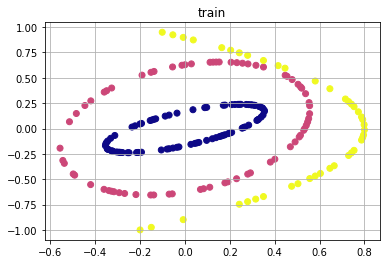

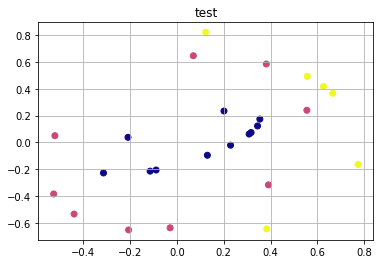

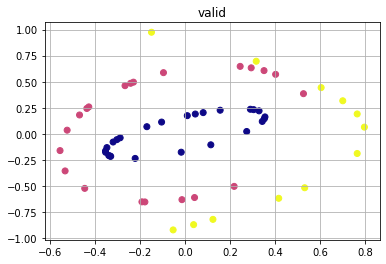

In [13]:
titles = ['train', 'test', 'valid']

for idx, df in enumerate((train, test, valid)):
    plt.scatter(df.x, df.y, c=p[idx], cmap=plt.cm.plasma)
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()


In [14]:
h = 0.025
grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(-1.2, 1.2+h, h) for j in np.arange(-1.2, 1.2+h, h)]


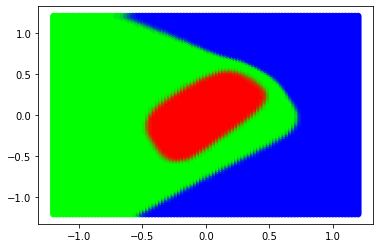

In [15]:
x_vals = np.arange(-1.2, 1.2+h, h)
y_vals = np.arange(-1.2, 1.2+h, h)

xx, yy = np.meshgrid(x_vals, y_vals)

rows = len(grid_pred)
colors = np.array(grid_pred).reshape((rows, 3))
colors.shape


plt.scatter(yy, xx, c=colors, cmap=plt.cm.plasma);
plt.show()

In [26]:
# Вторая часть ЛР

350


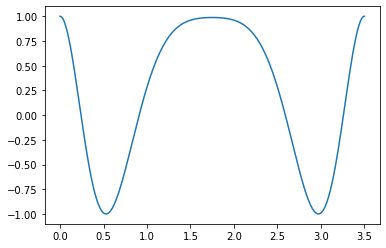

In [27]:
h = 0.01
t = np.linspace(0, 3.5, int(3.5/0.01), endpoint=True)
x = np.cos( (-2) * t ** 2 + 7 * t)
plt.plot(t, x)
print(len(t))

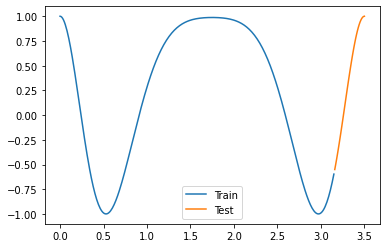

In [28]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = x[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [29]:
model = Sequential()
model.add(Dense(30, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [30]:

history = model.fit(X_train, y_train , epochs=600, verbose=1)

Epoch 1/600
315/315 [==============================] - 0s 484us/sample - loss: 0.5597
Epoch 2/600
315/315 [==============================] - 0s 50us/sample - loss: 0.5510
Epoch 3/600
315/315 [==============================] - 0s 45us/sample - loss: 0.5441
Epoch 4/600
315/315 [==============================] - 0s 42us/sample - loss: 0.5408
Epoch 5/600
315/315 [==============================] - 0s 42us/sample - loss: 0.5364
Epoch 6/600
315/315 [==============================] - 0s 42us/sample - loss: 0.5341
Epoch 7/600
315/315 [==============================] - 0s 42us/sample - loss: 0.5311
Epoch 8/600
315/315 [==============================] - 0s 45us/sample - loss: 0.5291
Epoch 9/600
315/315 [==============================] - 0s 39us/sample - loss: 0.5268
Epoch 10/600
315/315 [==============================] - 0s 39us/sample - loss: 0.5243
Epoch 11/600
315/315 [==============================] - 0s 40us/sample - loss: 0.5211
Epoch 12/600
315/315 [==============================] - 0s 39u

RMSE = 0.24148449192251223
RMSE = 2.1962793871678925


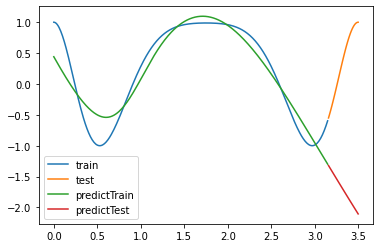

In [31]:


plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE = {np.sqrt(mse)}')

pred_x = model.predict(X_test[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')

plt.legend()
plt.show()

In [32]:
# Третья часть ЛР

350


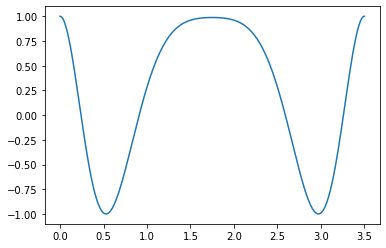

In [33]:
h = 0.01
t = np.linspace(0, 3.5, int(3.5/0.01), endpoint=True)
x = np.cos( (-2) * t ** 2 + 7 * t)

plt.plot(t, x)
print(len(t))

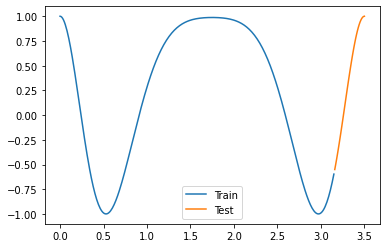

In [34]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = x[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [63]:
modelNeuPy = algorithms.LevenbergMarquardt((Input(1), Tanh(10), Linear(1)), verbose=True)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/linear-8:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.18 seconds


In [85]:
modelNeuPy.train(X_train, y_train, epochs=1)

#16 : [26 ms] train: 0.008629


RMSE = 0.08608157182356473
RMSE = 1.3354139429956413


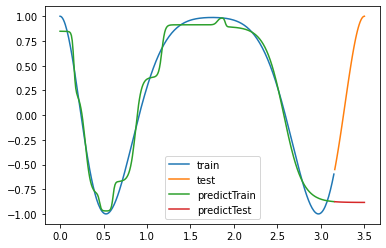

In [86]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = modelNeuPy.predict(X_train)
mse = sklearn.metrics.mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE = {np.sqrt(mse)}')


pred_x = modelNeuPy.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')
plt.legend()
plt.show()